# Programming for Data Analysis
## Autumn 2021 Assignment
___

<br>

![NumPy_logo](Images/NumPy_logo.png)

<br>

## numpy.random 

**numpy.random** is a module within the bigger NumPy package which allows us to sample **pseudo-random** numbers and gives us a range of tools to implement them. Although there already is a random module in the Python standard library, numpy.random adds much extra functionality in particular in relation to arrays and has the ability to draw from a lot more statistical distributions. Computers can't really 'do random' - they need a set of instructions to produce an output - so programs like numpy.random use algorithims to generate random numbers. Thus they are not truly random but pseudo-random. This also means they are predictable and also reproducible with is of much benefit when running experimental code.

**CHECK**

>The new infrastructure takes a different approach to producing random numbers from the RandomState object. Random number generation is separated into two components, a bit generator and a random generator.

>The BitGenerator has a limited set of responsibilities. It manages state and provides functions to produce random doubles and random unsigned 32- and 64-bit values.

>The random generator takes the bit generator-provided stream and transforms them into more useful distributions, e.g., simulated normal random values. This structure allows alternative bit generators to be used with little code duplication.

>The Generator is the user-facing object that is nearly identical to the legacy RandomState. It accepts a bit generator instance as an argument. The default is currently PCG64 but this may change in future versions. As a convenience NumPy provides the default_rng function to hide these details:

<br> 

### NumPy

NumPy is the primary python library for working with arrays. The name itself comes from Numerical Python, and it has become the fundamental package for scientific computing and also the foundation for many other analytic libraries in the python language.

> "NumPy ... is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays."  
https://en.wikipedia.org/wiki/NumPy

<br>

### Simple random data

The numpy.random module has been updated recently so I will mostly be concentrating on the newer version and methods. All of the older methods are still supported, and I may be using some of them to demonstrate some aspects of the library. We begin by importing numpy, as per comvention and economy of space as **np**.

In [1]:
# importing NumPy
import numpy as np

# importing matplotlib.pyplot for plotting and visualisations
import matplotlib.pyplot as plt

import pandas as pd

import seaborn as sns

In [2]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [3]:
# set global style for all plots
plt.style.use('classic')

# set global plot size
plt.rcParams['figure.figsize'] = (12,8)

Numpy creates random numbers through the use of a **BitGenerator** and a **Generator** - the BitGenerator generates random sequences of bits which are transformed into values by the generator using a variety of distributions.
We can create a new constructor using the **default_rng** method to get a new instance of a generator.  

In [4]:
# using default_rng() to get a new random number generator
rng = np.random.default_rng()
rng

Generator(PCG64) at 0x7FDA8E8199E0

The default bitgenerator is PCG64 which is a 128-bit implementation of **O’Neill’s permutation congruential generator**.  
> "PCG is a family of simple fast space-efficient statistically good algorithms for random number generation. Unlike many general-purpose RNGs, they are also hard to predict."  
https://www.pcg-random.org/index.html

We can pass a seed to the generator or let the computer pull a number from the operating system. More about that later!

<br>

**numpy.random.default_rng.random** returns floating point numbers. If no value is passed we get one randomly generated float. If one value is passed we get an array of that length, and if a second value is passed (with extra brackets) we get a 2D array with those parameters.

In [5]:
# returns a single float
x = rng.random()
print(x)

0.95443885598135


In [6]:
# returns an array of 3 floats
y = rng.random(3)
print(y)

[0.68506999 0.48222733 0.18335163]


In [7]:
# returns an array of 3x3 floats
z = rng.random((3,3))
print(z)

[[0.43386611 0.26583944 0.10606735]
 [0.48606379 0.47333974 0.2409817 ]
 [0.90669497 0.45177159 0.6288308 ]]


<br>

**numpy.random.default_rng.integers** returns integers. If we pass 1 value, that will be the upper limit and non inclusive. 0 is the default lower limit. If we pass 2 values, the first will be the lower limit and the 2nd the upper. 3 values, and the third will be the amount of numbers creating an array.

In [8]:
# returns an integer between 0-9
x = rng.integers(10)
print(x)

0


In [9]:
y = rng.integers(3,10)
print(y)

4


In [10]:
# returns an array of 20 numbers between 2-9
z = rng.integers(2,10,20)
print(z)

[8 8 6 8 9 4 5 2 4 4 6 6 2 2 3 2 9 6 4 4]


For all of the above code, if we rerun it we will get different results each time. If we want reproducible results we need to pass in a **seed**. We will look at this in more detail later.

<br>

#### Permutations

<br>

Within the numpy.random library there are many methods we can use to randomly manipulate the generated or given data. **permutation()** and **shuffle()** both rearrange the order of an array. The main difference is that permutation creates a new array while shuffle alters the original array.

In [11]:
# creating an array of numbers 1 to 10
arr = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])

# random permutation
rng.permutation(arr)

array([7, 9, 8, 3, 2, 5, 1, 6, 4])

In [12]:
# the original array is intact
arr

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [13]:
# 'shuffles' the array and alters the original
rng.shuffle(arr)
arr

array([6, 1, 3, 8, 7, 5, 2, 9, 4])

We can use permutation to create a random array from a range

In [14]:
# creates a permutation of the numbers 0-19
print(rng.permutation(20))

[16  9  1 12  7  0 17  3  4  8 18 14  5  6 15  2 13 11 19 10]


We can also use it on 2 dimensional arrays. Interestingly it maintains the numbers and order within each row and only rearranges the actual rows. If we add the parameter axis=1 we can permutate within the rows also

In [15]:
# creates 12 numbers and shapes them into a 3x4 arrany
array = np.arange(12).reshape((3, 4))

# prints the array
print(array)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [16]:
# permutates the 2D array - rows only
rng.permutation(array)

array([[ 8,  9, 10, 11],
       [ 0,  1,  2,  3],
       [ 4,  5,  6,  7]])

In [17]:
# permutates the 2D array - rows and within rows
rng.permutation(array, axis=1)

array([[ 2,  3,  0,  1],
       [ 6,  7,  4,  5],
       [10, 11,  8,  9]])

In [18]:
# just to confirm the original array is intact
array

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

We can do the same using the shuffle method - again the main difference being shuffle alters the original array.

In [19]:
# shuffles the array
rng.shuffle(array, axis=1)
array

array([[ 2,  3,  0,  1],
       [ 6,  7,  4,  5],
       [10, 11,  8,  9]])

In [20]:
# just to confirm the array is now altered
array

array([[ 2,  3,  0,  1],
       [ 6,  7,  4,  5],
       [10, 11,  8,  9]])

<br>

A few other interesting methods available to us

**numpy.random.default_rng.choice** generates a random sample from a given array. The first value in brackets is the upper range, while the 2nd is the number of values returned.

In [21]:
# choose 7 numbers at random from the range 0-39
rng.choice(40, 7)

array([21, 14, 16, 21, 32, 15, 13])

**numpy.random.default_rng.bytes** returns random bytes

In [22]:
# returns 10 random bytes!
rng.bytes(10)

b'B\xa1\xcd\x843\x0f\xb7LY\xb8'

<br>

## Distributions
___

Probability distributions are how values are distributed within a given range or criteria. I will go through several of the more common examples.

### Uniform Distribution

This is where each event has an equal chance of occurring, such as rolling a single dice or choosing a particular playing card from the deck.
The basic syntax is as follows - the default parameters are 0.0 and 1.0 so the following code will return a floating point number between those two values. The uniform distribution dictates that the value has an equal chance of falling at any point between the 2, although upper limit is non-inclusive.

In [23]:
# return a floating point number between 0.0 and 1.0 (not including 1)
rng.uniform()

0.5110719807082205

We can pass some parameters in then

In [24]:
# returns a floating point number between 0.0 and 4.0
x = rng.uniform(4)
x

2.6405471680914063

In [25]:
# return a floating point number between 3.0 and 4.0
x = rng.uniform(3,4)
x

3.020345717683377

In [26]:
# returns a 2D (4x3) array of floating point numbers between 10.0 and 15.0
x = rng.uniform(10, 15, size=(4, 3))
x

array([[14.77053886, 14.4029982 , 11.61568721],
       [13.86226288, 10.86749744, 11.37923089],
       [14.78768999, 11.6878392 , 14.48245187],
       [14.60625472, 11.60819779, 12.38369383]])

<br>

#### Sample size

The following code creates various sizes of arrays of values between 0 and 100. In theory there's an equal chance for each value to occur but this only becomes obvious when we increase the smaple size. The set of plots below demonstrate that clearly. The final plot which has a sample of 1 million values is nearly a straight line.

In [27]:
# looking at the difference the sample size makes
x = rng.integers(100, size = 10)
y = rng.integers(100, size = 100)
z = rng.integers(100, size = 1000)
a = rng.integers(100, size = 10000)
b = rng.integers(100, size = 100000)
c = rng.integers(100, size = 1000000)

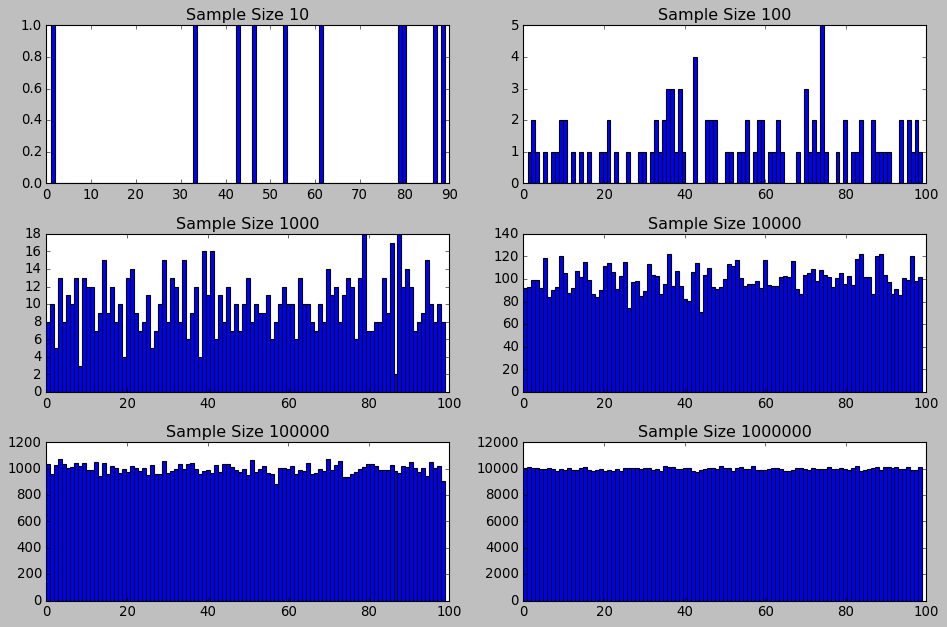

In [28]:
# plt.subplots(3,2) creates 3 rows and 2 columns of plots
# axs[0,0] etc. specifies where this plot goes in the arrangement
fig, axs = plt.subplots(3,2)
axs[0,0].hist(x, bins=100)
axs[0,0].set_title('Sample Size 10')
axs[0,1].hist(y, bins=100)
axs[0,1].set_title('Sample Size 100')
axs[1,0].hist(z, bins=100)
axs[1,0].set_title('Sample Size 1000')
axs[1,1].hist(a, bins=100)
axs[1,1].set_title('Sample Size 10000')
axs[2,0].hist(b, bins=100)
axs[2,0].set_title('Sample Size 100000')
axs[2,1].hist(c, bins=100)
axs[2,1].set_title('Sample Size 1000000')
# creates space between each of the subplots
fig.tight_layout()

Another example below, this time specifying a lower minus value. As above if no lower value is set then zero is the default.

In [29]:
# range is -1 to 0, and we're getting 1000 numbers
y = np.random.uniform(-1,0,1000)
y

array([-9.58122568e-01, -7.71133377e-01, -8.41710913e-01, -7.46432006e-01,
       -6.15561152e-01, -4.10957412e-01, -4.64126028e-01, -3.83537101e-02,
       -2.51498329e-01, -3.37677613e-01, -1.47944865e-01, -3.83512188e-01,
       -2.71226734e-01, -7.78827618e-01, -7.98484513e-01, -8.35679844e-01,
       -3.39754874e-02, -5.44845531e-01, -8.58971369e-01, -3.13918305e-01,
       -9.43429285e-01, -1.28185902e-01, -4.53632061e-01, -1.92602081e-01,
       -1.44894351e-01, -9.72282042e-01, -2.68608947e-01, -3.29348455e-01,
       -6.76536579e-01, -2.04384377e-01, -1.75362817e-01, -8.01904415e-01,
       -9.04209193e-01, -8.63987337e-01, -3.75208819e-01, -8.19792336e-01,
       -2.03364908e-02, -6.90973523e-02, -5.35161541e-01, -8.47265247e-01,
       -4.23103778e-01, -4.92563322e-01, -3.44192287e-01, -7.49681291e-01,
       -6.10123410e-01, -3.75850035e-01, -8.15704051e-01, -8.03773590e-01,
       -9.85605703e-01, -5.39508756e-01, -6.18918401e-01, -7.53755010e-02,
       -9.31345387e-01, -

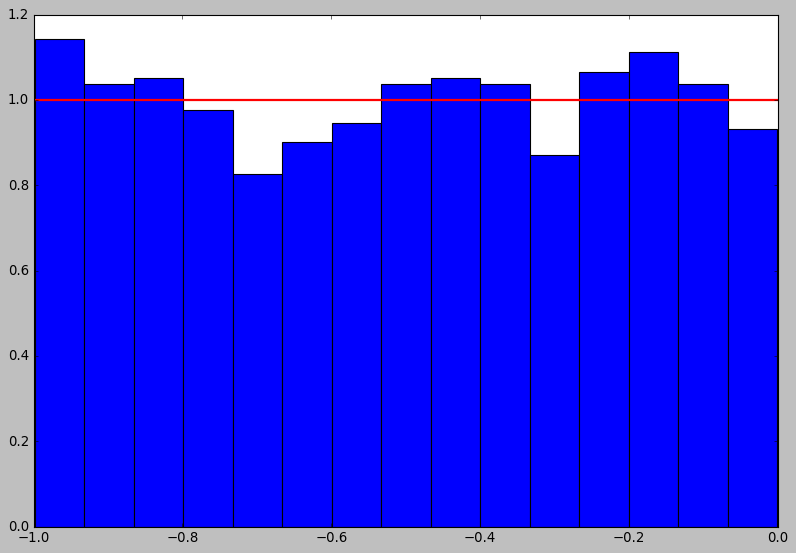

In [30]:
# visualise
count, bins, ignored = plt.hist(y, 15, density=True)
plt.plot(bins, np.ones_like(bins), linewidth=2, color='r') # include a red line to show the average

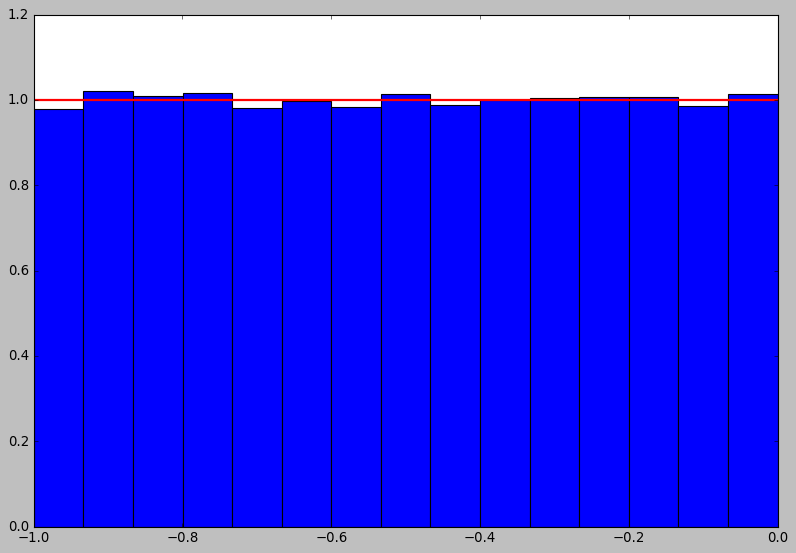

In [31]:
# the more times we run it the flatter the line at the top
x = np.random.uniform(-1,0,100000)

count, bins, ignored = plt.hist(x, 15, density=True)
plt.plot(bins, np.ones_like(bins), linewidth=2, color='r')

## Normal distribution

![Normal_Dist](Images/standardNormal2.png)

Normal distribution represents the behavior of most of the situations in the universe - that's why it’s called a “normal” distribution. I guess! Also know as Standard Normal, Gaussian Distribution or Bell Curve, it is one of the widest used distributions. It represents things like IQ Scores and heartbeats among others.  
The parameters are as follows:
1) mean - peak of the bell curve
2) standard deviation - distance from the mean
3) size - shape of the array  

If no paremters are passed a single value will be returned using a mean of 0 and standard deviation of 1

In [32]:
rng.normal()

-1.2760496206201453

What is the difference between standard_normal and normal?

In [33]:
# returns an aray of 4 random normally distributed numbers using a mean of 0 and SD of 1
rng.standard_normal(40)

array([-0.24398701, -0.9653929 , -0.1935611 , -1.12198535,  0.50002692,
       -1.02198289, -0.60858525, -1.30333914,  1.90155645,  1.34556039,
       -0.45548861,  0.68428293, -0.84584276, -0.03433351,  1.01528027,
        0.35858783,  0.07381984, -0.68821499,  1.01250212, -0.20798989,
       -0.79130695,  1.19163253, -0.74396089,  1.41354587, -1.68405681,
        0.86784357, -0.66784627, -0.3880131 ,  0.39325975, -1.20610786,
        0.94089718,  0.77806167,  1.42990994,  1.72836895, -0.75652515,
       -1.11362002, -0.50993632, -2.64663453, -0.6882413 , -1.23381157])

In [34]:
# specifying the mean as 4.0
z = rng.normal(size=100)
z

array([ 1.35049303e+00,  2.42505652e-01, -9.41079969e-01,  7.81640609e-02,
        2.02607741e+00, -6.26058462e-01,  4.46270174e-01, -9.35984425e-01,
       -7.66777636e-01, -3.41292117e-01, -9.94639846e-01, -1.42481833e+00,
       -1.24117972e+00,  5.19560028e-01, -1.10139217e+00,  6.13725740e-01,
        3.48081705e-01,  1.14541593e+00, -1.25181065e-01, -9.10570263e-01,
       -1.09915609e+00, -1.68434189e-01,  7.35271662e-01, -2.97538239e-01,
        3.47690687e-01,  4.74266822e-02, -1.41513209e+00, -6.78990536e-01,
        2.61173790e-01,  2.20136771e-01,  4.79891232e-01, -9.03821642e-02,
        9.56382211e-01, -7.02256412e-01,  5.11053740e-01,  2.58501287e-01,
       -4.47347215e-01, -1.25207524e+00,  8.78087451e-01, -3.02894453e+00,
       -2.57621671e-01, -3.18589380e-01,  6.27270765e-01, -2.08720698e-01,
        9.29655154e-01,  2.62794435e+00, -8.94683730e-01, -4.09207657e-01,
       -1.91751116e-01, -9.11872567e-01,  7.01862798e-01,  3.18053353e-01,
       -5.77939342e-01,  

(array([ 1.,  2.,  6., 16., 16., 24., 23.,  6.,  3.,  3.]),
 array([-3.02894453, -2.46325564, -1.89756676, -1.33187787, -0.76618898,
        -0.20050009,  0.3651888 ,  0.93087769,  1.49656658,  2.06225546,
         2.62794435]),
 <BarContainer object of 10 artists>)

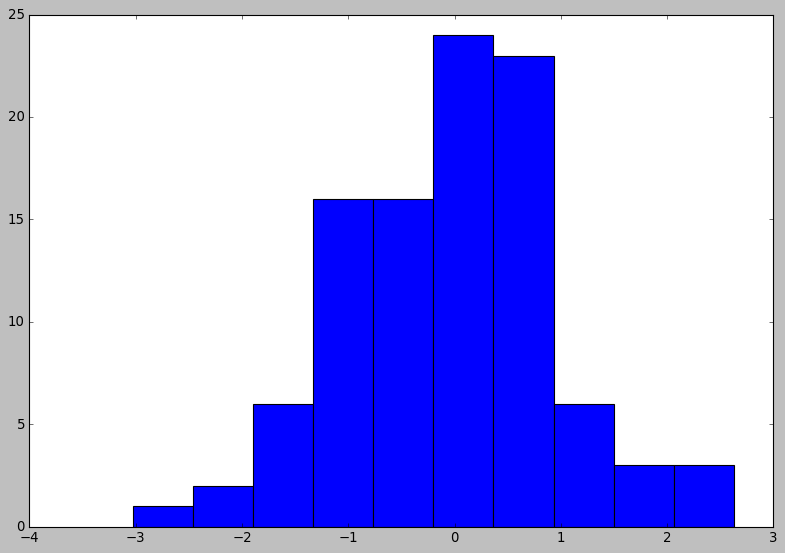

In [35]:
# creates a histogram for z
plt.hist(z)

(array([ 1.,  0.,  1.,  1.,  2.,  4.,  5., 11.,  7.,  9., 14., 10., 17.,
         6.,  4.,  2.,  1.,  2.,  1.,  2.]),
 array([-3.02894453, -2.74610009, -2.46325564, -2.1804112 , -1.89756676,
        -1.61472231, -1.33187787, -1.04903342, -0.76618898, -0.48334453,
        -0.20050009,  0.08234435,  0.3651888 ,  0.64803324,  0.93087769,
         1.21372213,  1.49656658,  1.77941102,  2.06225546,  2.34509991,
         2.62794435]),
 <BarContainer object of 20 artists>)

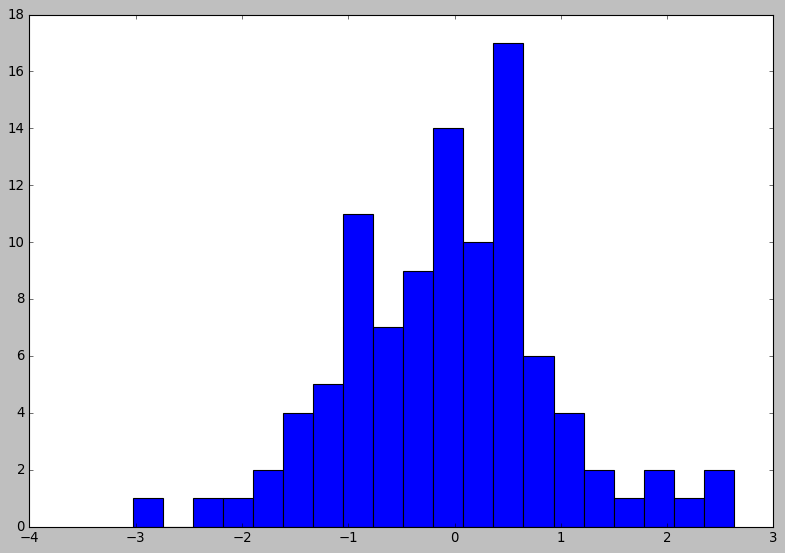

In [36]:
# specifies the bins which smoothes things out
plt.hist(z, bins=20)

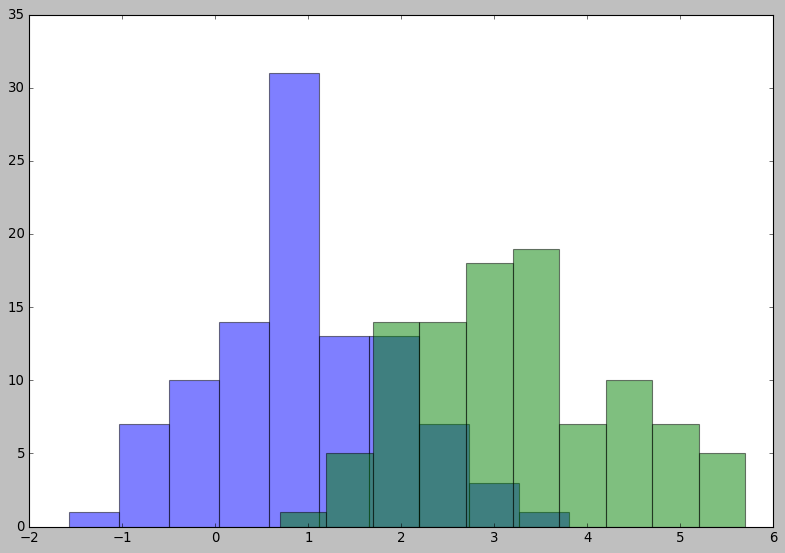

In [37]:
# looking at changing the loc (mean)
x = rng.normal(loc=1.0, size=100)
y = rng.normal(loc=3.0, size=100)
fig, ax = plt.subplots()

# plotting both on the same axis
# alpha is transparency
ax.hist(x, bins=10, alpha=0.5)
ax.hist(y, bins=10, alpha=0.5);

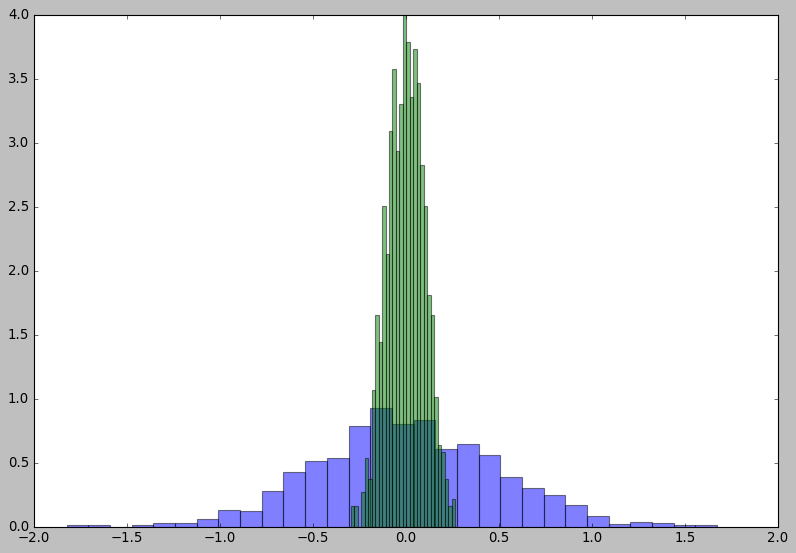

In [38]:
# looking at changing the scale (standard deviation)
x = rng.normal(scale=0.5, size=1000)
y = rng.normal(scale=0.1, size=1000)
fig, ax = plt.subplots()

# plotting both on the same axis
# alpha is transparency
ax.hist(x, bins=30, alpha=0.5, density=True)
ax.hist(y, bins=30, alpha=0.5, density=True);

<AxesSubplot:ylabel='Density'>

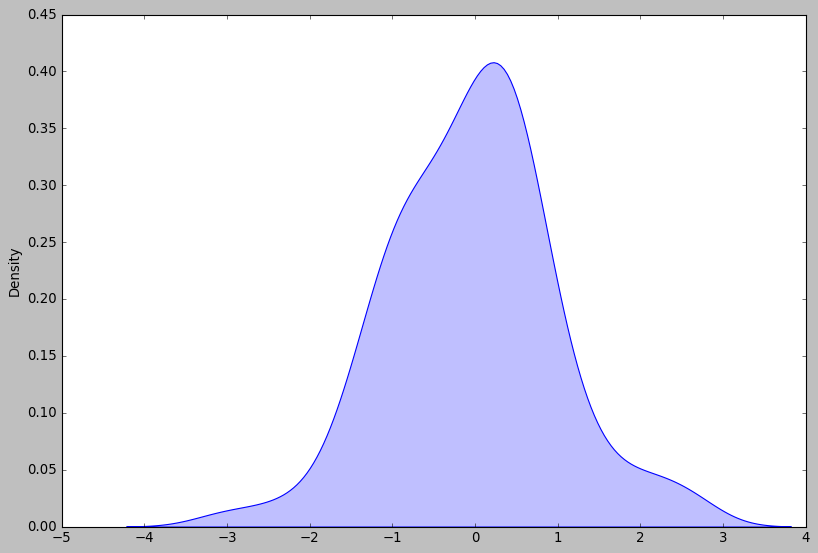

In [39]:
# https://seaborn.pydata.org/generated/seaborn.kdeplot.html
sns.kdeplot(data=z, fill=True)

We can do a similar demonstration to above to show how the sample size affects the outcome. We use the default paramters of mean=0 and SD=1 and create arrays between 10 and 1,000,000. Again the higher the sample size the more perfect the bell shaped curve. 

In [40]:
x = rng.standard_normal(10)
y = rng.standard_normal(100)
z = rng.standard_normal(1000)
a = rng.standard_normal(10000)
b = rng.standard_normal(100000)
c = rng.standard_normal(1000000)

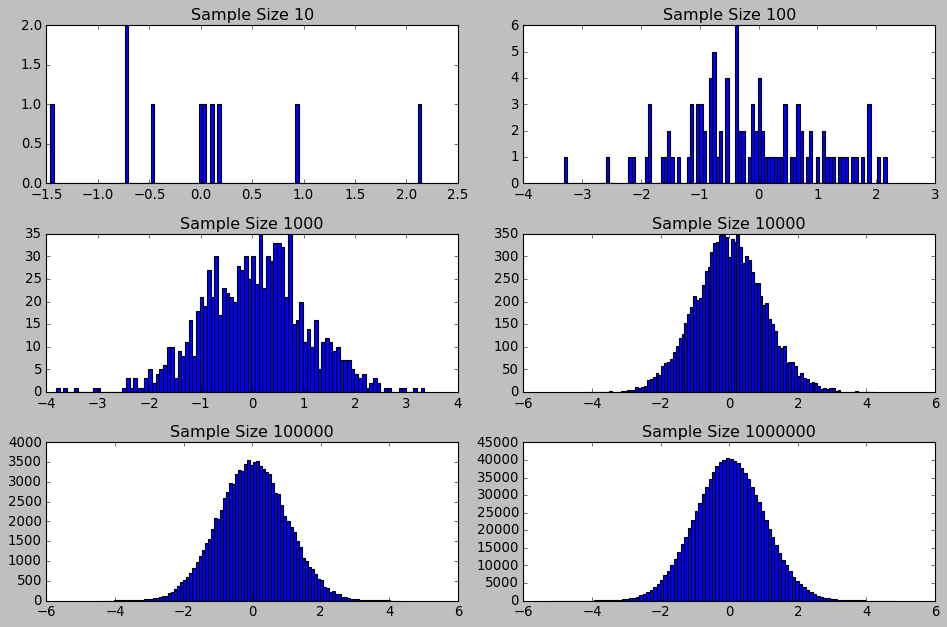

In [41]:
# plt.subplots(3,2) creates 3 rows and 2 columns of plots
# axs[0,0] etc. specifies where this plot goes in the arrangement
fig, axs = plt.subplots(3,2)
axs[0,0].hist(x, bins=100)
axs[0,0].set_title('Sample Size 10')
axs[0,1].hist(y, bins=100)
axs[0,1].set_title('Sample Size 100')
axs[1,0].hist(z, bins=100)
axs[1,0].set_title('Sample Size 1000')
axs[1,1].hist(a, bins=100)
axs[1,1].set_title('Sample Size 10000')
axs[2,0].hist(b, bins=100)
axs[2,0].set_title('Sample Size 100000')
axs[2,1].hist(c, bins=100)
axs[2,1].set_title('Sample Size 1000000')
# creates space between each of the subplots
fig.tight_layout()

## Binomial Distribution

Binomial distribution is when we're dealing with only 2 outcomes. These can be equal (0.5) such as a coin toss as demomstrated below, or any probability inserted as a parameter.  
The syntax is demonstrated below where n = the number of trials and and p = the probability of success for either outcome.

In [42]:
# simple example which returns either 0 or 1
rng.binomial(n=1, p=0.5)

0

#### Coin toss simulation

The following code simulates tossing a coin 1000 times with the results shown in a bar chart

In [43]:
# n = number of trials, p = probability of success for each trial
# s = result of tossing the coin 1000 times
s = rng.binomial(n=1, p=0.5, size=1000)
s

array([1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,

<BarContainer object of 2 artists>

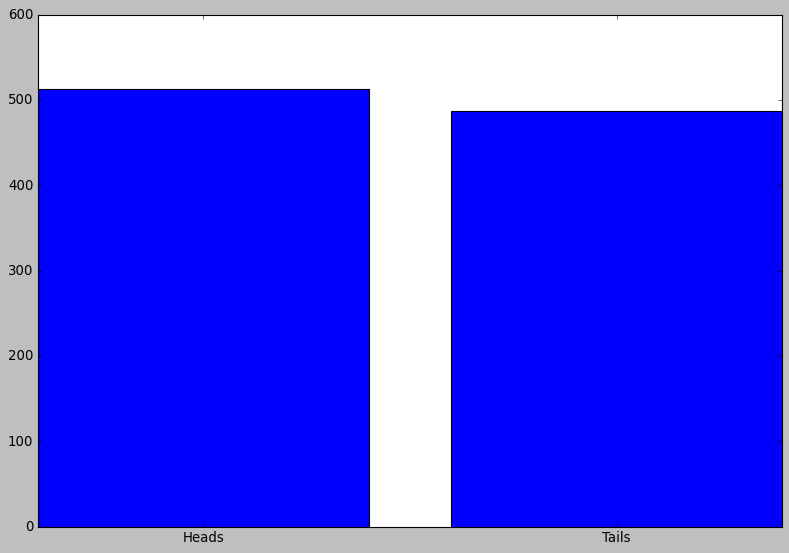

In [44]:
plt.bar(['Heads', 'Tails'], [s.size - s.sum(), s.sum()])

<BarContainer object of 2 artists>

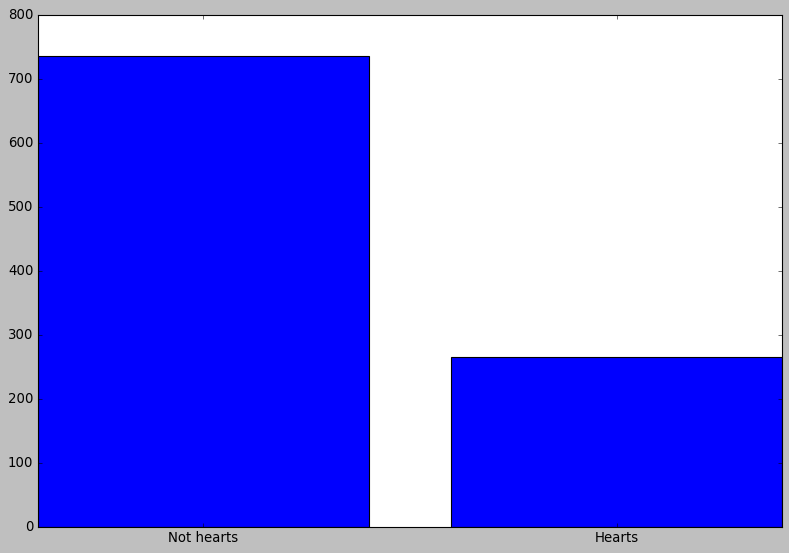

In [45]:
# change the probability to 0.25 to simulate choosing a heart from a deck of cards!
s = rng.binomial(n=1, p=0.25, size=1000)
plt.bar(['Not hearts', 'Hearts'], [s.size - s.sum(), s.sum()])

Back to the coins! This simulates tossing the coin 10 times and counting the success of either heads or tails, then repeating that 1000 times.

In [46]:
u = rng.binomial(n=10, p=0.5, size=1000)
u

array([ 7,  9,  5,  3,  5,  1,  2,  6,  6,  3,  4,  5,  6,  3,  5,  3,  4,
        5,  3,  7,  4,  3,  4,  8,  5,  6,  7,  4,  6,  4,  4,  5,  5,  5,
        6,  6,  7,  7,  6,  4,  3,  4,  3,  1,  6,  3,  5,  3,  7,  4,  4,
        4,  4,  4,  3,  7,  6,  5,  6,  7,  6,  6,  5,  5,  5,  7,  7,  5,
        6,  5,  6,  4,  5,  5,  7,  7,  7,  1,  8,  4,  5,  6,  3,  7,  5,
        3,  5,  5,  6,  6,  3,  8,  3,  7,  2,  3,  3,  5,  6,  2,  7,  6,
        7,  2,  7,  5,  5,  6,  4,  5,  6,  3,  4,  5,  4,  5,  3,  4,  4,
        6,  6,  5,  7,  5,  4,  4,  7,  6,  4,  4,  7,  5,  6,  6,  5,  7,
        4,  4,  5,  6,  6,  5,  5,  7,  2,  2,  7,  7,  5,  3,  5,  4,  7,
        4,  2,  6,  3,  4,  5,  5,  6,  6,  6,  7,  5,  4,  2,  5,  4,  9,
        4,  5,  4,  5,  3,  6,  3,  6,  6,  4,  6,  5,  3,  4,  7,  6,  5,
        5,  6,  1,  6,  2,  7,  4,  4,  3,  4,  4,  5,  5,  7,  5,  4,  6,
        7,  7,  5,  8,  4,  5,  3,  7,  6,  7,  5,  6,  5,  3,  6,  3,  5,
        7,  4,  7,  3,  4

In [47]:
unique, counts = np.unique(u, return_counts=True)
unique

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [48]:
counts

array([  9,  45, 109, 209, 241, 199, 129,  45,  13,   1])

<BarContainer object of 10 artists>

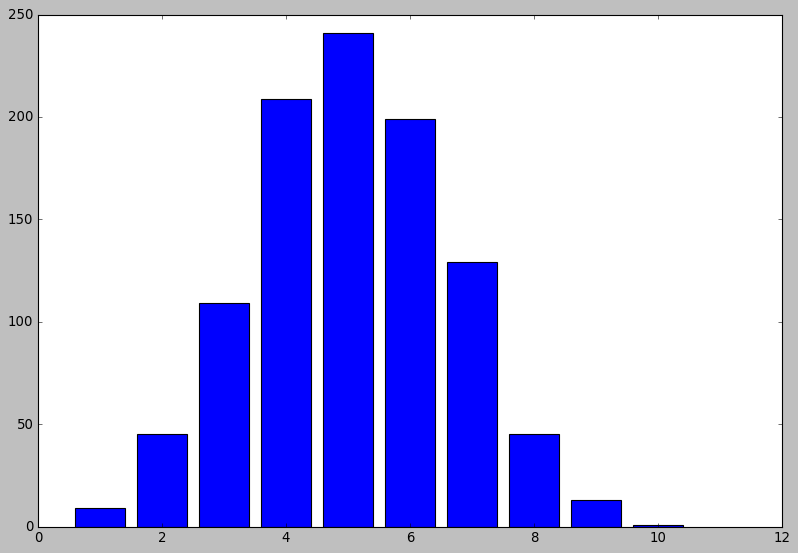

In [49]:
plt.bar(unique,counts)

Looks like a normal distribution!

A contrived real world example from my other life! A blind man walks into a room with a piano and randomly plays a note - what are the chances of him not playing a C? There are 11 Cs out of 88 notes so that is a probability of 1/8 or 0.125. What is the probability of him missing the C if he repeats it 5 times?  
We do 10000 trials of the model, and count the number that generate zero positive results.

In [50]:
sum(rng.binomial(5, 0.125, 10000) == 0)/10000.

0.5095

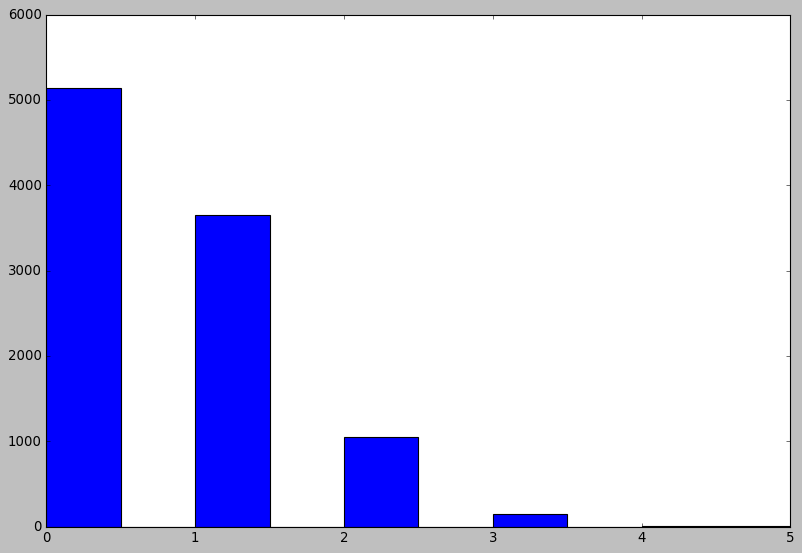

In [51]:
# to visualise that
a = rng.binomial(5, 0.125, 10000)
plt.hist(a);

## Poisson Distribution

Poisson Distribution can be used to simulate number of 'events' occuring in specific intervals when the average freqency rate is known and is not dependent on the previous occurances. The basic syntax is demonstrated below where the first parameter is the average number of events and the second the amount of values returned. 
The following is a good example from wikipedia:  
>"... a call center receives an average of 180 calls per hour, 24 hours a day. The calls are independent; receiving one does not change the probability of when the next one will arrive. The number of calls received during any minute has a Poisson probability distribution: the most likely numbers are 2 and 3 but 1 and 4 are also likely and there is a small probability of it being as low as zero and a very small probability it could be 10.  
https://en.wikipedia.org/wiki/Poisson_distribution

In [52]:
# 5 is average number of events, 10 is the amount returned
rng.poisson(5,10)

array([6, 2, 7, 6, 8, 8, 5, 6, 5, 4])

I'm going to try and simulate people going to the pub between 6pm and 11.30 on the 14th November! Obviously there are many other factors which may influence this but this will show the code!

In [53]:
# creates the range and time interval
range = pd.date_range("18:00", "23:30", freq="15min")
range

DatetimeIndex(['2021-11-15 18:00:00', '2021-11-15 18:15:00',
               '2021-11-15 18:30:00', '2021-11-15 18:45:00',
               '2021-11-15 19:00:00', '2021-11-15 19:15:00',
               '2021-11-15 19:30:00', '2021-11-15 19:45:00',
               '2021-11-15 20:00:00', '2021-11-15 20:15:00',
               '2021-11-15 20:30:00', '2021-11-15 20:45:00',
               '2021-11-15 21:00:00', '2021-11-15 21:15:00',
               '2021-11-15 21:30:00', '2021-11-15 21:45:00',
               '2021-11-15 22:00:00', '2021-11-15 22:15:00',
               '2021-11-15 22:30:00', '2021-11-15 22:45:00',
               '2021-11-15 23:00:00', '2021-11-15 23:15:00',
               '2021-11-15 23:30:00'],
              dtype='datetime64[ns]', freq='15T')

In [54]:
# new dataframe with random poisson distributed data to simulate pub punters
# 20 is the average number of admissions per 30min interval
punters = rng.poisson(20, len(range))

# index is timeseries created above
punterSchedule = pd.DataFrame(punters, index=range,columns=['New Punters'])
punterSchedule

,New Punters
2021-11-15 18:00:00,13
2021-11-15 18:15:00,13
2021-11-15 18:30:00,21
2021-11-15 18:45:00,20
2021-11-15 19:00:00,16
2021-11-15 19:15:00,23
2021-11-15 19:30:00,21
2021-11-15 19:45:00,19
2021-11-15 20:00:00,19
2021-11-15 20:15:00,20


The lineplot below uses seaborn to visualise this

<AxesSubplot:ylabel='New Punters'>

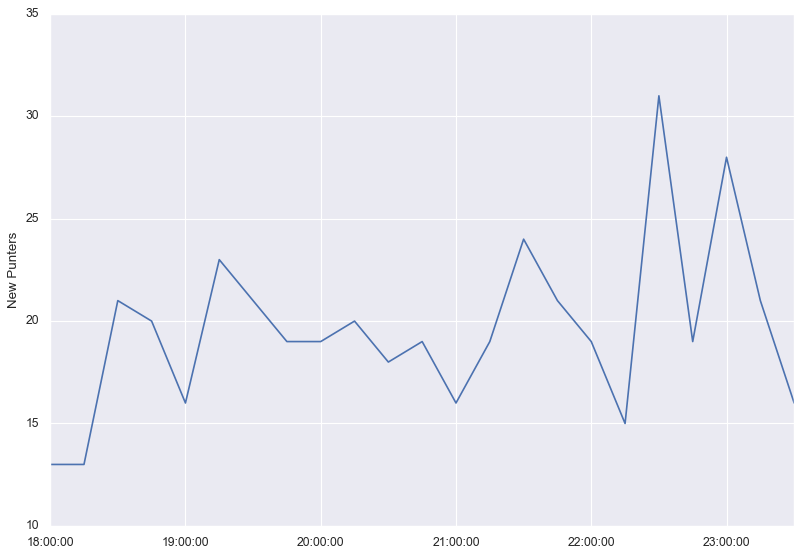

In [55]:
# creates a lineplot
sns.set(style="darkgrid")
sns.lineplot(x=range, y='New Punters', data = punterSchedule)

<br>

## Exponential Distribution

The exponential distribution is a continuous distribution that is commonly used to measure the expected time for an event to occur, or time until the next event. 
There are 2 parameters:  
1) scale - inverse of rate - defaults is 1.0.
2) size - The shape of the returned array.

In [56]:
rng.exponential(2, 10)

array([0.19746352, 0.07451062, 0.12768371, 3.79459365, 1.18175376,
       0.13017779, 0.62591223, 0.8423853 , 0.22780588, 2.95824333])

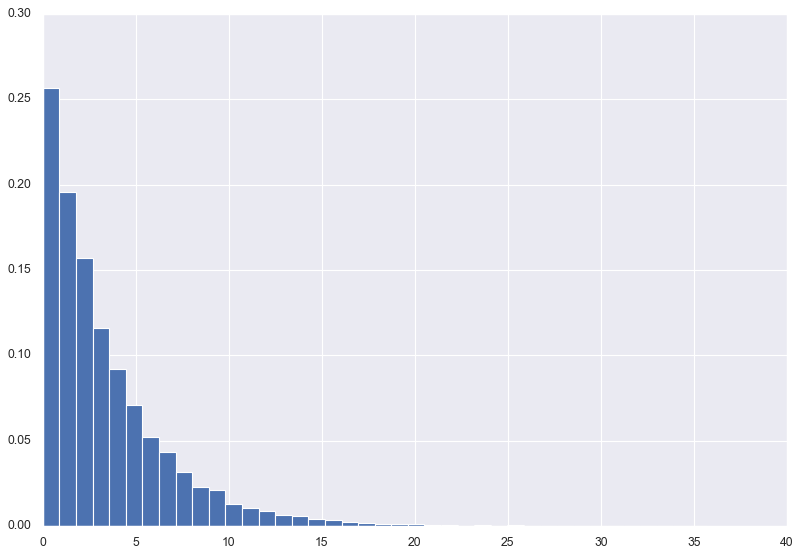

In [57]:
x = rng.exponential(3.45, 10000)
  
count, bins, ignored = plt.hist(x, 40, density = True)
plt.show()

<br>

## The use of seeds in generating pseudorandom numbers

>"Pseudorandomness is a sample of numbers that look close to random, but were generated using a deterministic process."
https://machinelearningmastery.com/how-to-generate-random-numbers-in-python/

<br>

As mentioned above, numbers returned using numpy.random module are not truly random at all. In fact computers dont't really do random that well! They are what is known as pseudo-random numbers - basically numbers that appear to be random but actually aren't. They are predetermined using algorithims, one of the benefits of which is that they are repeatable and reproducible which aids in all sorts of investigative coding and testing.
The seed is what numpy uses to generate the 'random' numbers - if we pass the seed to the NumPy pseudo-random number generator, every time we run the code we get the same result. Or we can let numpy generate one, and we won't get the same results each time. The following code demonstrates both situations.

In [58]:
# Every time we run this code we will get the same array
np.random.seed(0)
print(np.random.randint(10, size = 5))
np.random.seed(0)
print(np.random.randint(10, size = 5))
np.random.seed(0)
print(np.random.randint(10, size = 5))

[5 0 3 3 7]
[5 0 3 3 7]
[5 0 3 3 7]


In [59]:
# Whereas every time we run this code we will get a different array
print(np.random.randint(10, size = 5))
print(np.random.randint(10, size = 5))
print(np.random.randint(10, size = 5))

[9 3 5 2 4]
[7 6 8 8 1]
[6 7 7 8 1]


The actual number passed to the seed function doesn't really matter, but we need to be aware that changing the number will change the output. The following code demonstrates this:

In [60]:
# The first 2 of these will always produce will always produce the same float but different from each other
np.random.seed(0)
print(np.random.random())

np.random.seed(1)
print(np.random.random())

# This will always produce a different number
np.random.seed()
print(np.random.random())

0.5488135039273248
0.417022004702574
0.6399656293173611


The seed function can be used in conjunction with all of the other functions and wrappers already mentioned above, and is essential if your results need to be reproducible and shareable.

https://www.sharpsightlabs.com/blog/numpy-random-seed/

https://towardsdatascience.com/stop-using-numpy-random-seed-581a9972805f

## References/Sources/Links

NumPy - https://en.wikipedia.org/wiki/NumPy  
https://numpy.org/doc/stable/user/whatisnumpy.html  
https://pythonguides.com/python-numpy-random/  
https://realpython.com/python-random/#prngs-for-arrays-numpyrandom  
https://www.w3schools.com/python/numpy/numpy_random.asp  
https://numpy.org/doc/stable/reference/random/index.html  
https://numpy.org/doc/stable/reference/random/generator.html  
https://numpy.org/doc/stable/reference/random/index.html#random-quick-start  
https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.choice.html#numpy.random.Generator.choice  
https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.permutation.html#numpy.random.Generator.permutation  
Shuffle - https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.shuffle.html#numpy.random.Generator.shuffle   
Link to documentation - https://numpy.org/doc/1.16/reference/routines.random.html <br>
Poisson Distribution - https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.poisson.html#numpy.random.Generator.poisson  
Exponential Distribution - https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.exponential.html#numpy.random.Generator.exponential
Normal Distribution - https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.normal.html#numpy.random.Generator.normal  
new stuff here - https://numpy.org/doc/stable/reference/random/index.html?highlight=random%20sampling%20numpy%20random#module-numpy.random  
https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.uniform.html#numpy.random.Generator.uniform  
https://www.sharpsightlabs.com/blog/numpy-random-seed/
Link to binomial distribution documentation - https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.binomial.html#numpy.random.Generator.binomial

# END